<a href="https://colab.research.google.com/github/aarushi-sinha04/R-Capstone-women-participation-in-election/blob/main/Capstone_R_Analyzing_Women%E2%80%99s_Participation_in_Lok_Sabha_Elections_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages(c("tidyverse", "janitor"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages(c("readr", "treemapify"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("readr", "treemapify")):
“installation of package ‘readr’ had non-zero exit status”


In [ ]:
# Loading all the necessary packages.
library(tidyverse)
library(janitor)
library(readr)
library(treemapify)

In [ ]:
install.packages("googledrive")
library(googledrive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
drive_auth()

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=b8344047ff64312d3e03dbf6de69076e&access_type=offline&prompt=consent



In [ ]:
drive_find()

In [ ]:
drive_download("participation_of_women_electors_2024.csv", path = "Election Analysis.csv")

File downloaded:

• participation_of_women_electors_2024.csv
  <id: 1ofe_iT-e6Of1yMKH_Jsqg-Pkm8FYOn0A>

Saved locally as:

• Election Analysis.csv



In [ ]:
# Importing dataset.

women_participation <- read.csv("Election Analysis.csv")

In [ ]:
glimpse(women_participation)

Rows: 36
Columns: 10
$ STATE                                    <chr> "Andhra Pradesh", "Arunachal …
$ NO..OF.SEATS                             <int> 25, 2, 14, 40, 2, 26, 10, 4, …
$ TOTAL.ELECTORS                           <int> 39405967, 803563, 22050059, 7…
$ WOMEN.ELECTORS                           <int> 19880957, 403816, 10756988, 3…
$ X..OF.WOMEN.ELECTORS.OVER.TOTAL.ELECTORS <dbl> 50.45, 50.25, 48.78, 47.09, 5…
$ Total.Voters                             <int> 31674526, 659766, 17992753, 4…
$ WOMEN.Voters                             <int> 15818269, 326188, 8748413, 19…
$ X..OF.WOMEN.VOTERS.OVER.VOTERS           <dbl> 49.94, 49.44, 48.62, 48.93, 5…
$ X..OF.WOMEN.VOTERS.OVER.WOMEN.ELECTORS   <dbl> 79.56, 80.78, 81.33, 59.58, 7…
$ TOTAL.POLL..IN.THE.STATE.UT              <dbl> 80.38, 82.11, 81.60, 57.33, 7…


In [ ]:
# Changing the names to lowercase.

women_participation <- women_participation %>%
rename_with(tolower)


In [ ]:
# Checking if the columns' names have changed or not.

colnames(women_participation)

[1] "state"                                   
 [2] "no..of.seats"                            
 [3] "total.electors"                          
 [4] "women.electors"                          
 [5] "x..of.women.electors.over.total.electors"
 [6] "total.voters"                            
 [7] "women.voters"                            
 [8] "x..of.women.voters.over.voters"          
 [9] "x..of.women.voters.over.women.electors"  
[10] "total.poll..in.the.state.ut"

In [ ]:
# Removing the spaces between the names.

colnames(women_participation) <- gsub(" ","_",colnames(women_participation))

In [ ]:
# Rechecking the columns' names.

colnames(women_participation)

[1] "state"                                   
 [2] "no..of.seats"                            
 [3] "total.electors"                          
 [4] "women.electors"                          
 [5] "x..of.women.electors.over.total.electors"
 [6] "total.voters"                            
 [7] "women.voters"                            
 [8] "x..of.women.voters.over.voters"          
 [9] "x..of.women.voters.over.women.electors"  
[10] "total.poll..in.the.state.ut"

In [ ]:
women_participation <- women_participation %>%
clean_names()

In [ ]:
head(women_participation)
tail(women_participation)

,state,no_of_seats,total_electors,women_electors,x_of_women_electors_over_total_electors,total_voters,women_voters,x_of_women_voters_over_voters,x_of_women_voters_over_women_electors,total_poll_in_the_state_ut
,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Andhra Pradesh,25,39405967,19880957,50.45,31674526,15818269,49.94,79.56,80.38
2,Arunachal Pradesh,2,803563,403816,50.25,659766,326188,49.44,80.78,82.11
3,Assam,14,22050059,10756988,48.78,17992753,8748413,48.62,81.33,81.60
4,Bihar,40,71216290,33532797,47.09,40830453,19980370,48.93,59.58,57.33
5,Goa,2,1136113,580054,51.06,853724,441780,51.75,76.16,75.14
6,Gujarat,26,45152373,21697273,48.05,29128364,13214160,45.37,60.90,64.51


,state,no_of_seats,total_electors,women_electors,x_of_women_electors_over_total_electors,total_voters,women_voters,x_of_women_voters_over_voters,x_of_women_voters_over_women_electors,total_poll_in_the_state_ut
,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
31,Chandigarh,1,646729,304507,47.08,456637,215557,47.21,70.79,70.61
32,Dadra & Nagar Haveli,1,250029,117629,47.05,198984,95479,47.98,81.17,79.58
33,Daman & Diu,1,121740,60743,49.90,87473,45841,52.41,75.47,71.85
34,NCT of Delhi,7,14327649,6444347,44.98,8682366,3875512,44.64,60.14,60.60
35,Lakshadweep,1,55189,27136,49.17,47026,23549,50.08,86.78,85.21
36,Puducherry,1,973410,513811,52.78,790895,418834,52.96,81.52,81.25


In [ ]:
# Let's find out how many electors were there in 2024 General Elections.
# Electors are people registered in the electoral roll of a consituency. They are eligible to vote.

total_electors_india <- sum(women_participation$total_electors)
total_electors_india

[1] 911950734

In [ ]:
# Total number of women electors.

total_women_electors <- sum(women_participation$women_electors)
total_women_electors

[1] 438537911

In [ ]:
# Non women electors.

total_nonwomen_electors <- total_electors_india - total_women_electors
total_nonwomen_electors

[1] 473412823

In [ ]:
# Percentage of women electors.

percentage_women_electors <- (total_women_electors*100)/total_electors_india
percentage_women_electors

[1] 48.08789

In [ ]:
# Voters are those who casted their vote.

total_voters_india <- sum(women_participation$total_voters)
total_voters_india

[1] 614684398

In [ ]:
# Total number of women voters.

total_women_voters <- sum(women_participation$women_voters)
total_women_voters

[1] 294624323

In [ ]:
# Calculating the percentage of women turnout.

percentage_women_turnout <- (total_women_voters*100)/total_women_electors
percentage_women_turnout

[1] 67.18332

In [ ]:
# Total number of non women voters.

total_nonwomen_voters <- total_voters_india - total_women_voters
total_nonwomen_voters

[1] 320060075

In [ ]:
# Calculating the non women turnout.

percentage_nonwomen_turnout <- (total_nonwomen_voters*100)/total_nonwomen_electors
percentage_nonwomen_turnout

[1] 67.60697

In [ ]:
# Total turnout.

percentage_total_turnout <- (total_voters_india*100)/total_electors_india
percentage_total_turnout

[1] 67.40325

In [ ]:
summary(women_participation)

    state            no_of_seats    total_electors      women_electors    
 Length:36          Min.   : 1.00   Min.   :    55189   Min.   :   27136  
 Class :character   1st Qu.: 1.75   1st Qu.:  1095437   1st Qu.:  563493  
 Mode  :character   Median : 8.50   Median : 16192330   Median : 7392344  
                    Mean   :15.08   Mean   : 25331965   Mean   :12181609  
                    3rd Qu.:25.00   3rd Qu.: 40842568   3rd Qu.:20335036  
                    Max.   :80.00   Max.   :146134603   Max.   :67055997  
 x_of_women_electors_over_total_electors  total_voters       women_voters     
 Min.   :44.98                           Min.   :   47026   Min.   :   23549  
 1st Qu.:47.52                           1st Qu.:  838017   1st Qu.:  436044  
 Median :48.81                           Median :10691698   Median : 4837968  
 Mean   :48.76                           Mean   :17074567   Mean   : 8184009  
 3rd Qu.:49.99                           3rd Qu.:29764904   3rd Qu.:13744412  
 

In [ ]:
# Let's find the state with the maximum women turnout

max_turnout <- women_participation[which.max(women_participation$percent_of_women_voters_over_women_electors),]
max_turnout

state,no_of_seats,total_electors,women_electors,x_of_women_electors_over_total_electors,total_voters,women_voters,x_of_women_voters_over_voters,x_of_women_voters_over_women_electors,total_poll_in_the_state_ut
<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>


In [ ]:
# State with the lowest women turnout.

min_turnout <- women_participation[which.min(women_participation$percent_of_women_voters_over_women_electors),]
min_turnout

state,no_of_seats,total_electors,women_electors,x_of_women_electors_over_total_electors,total_voters,women_voters,x_of_women_voters_over_voters,x_of_women_voters_over_women_electors,total_poll_in_the_state_ut
<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>


In [ ]:
# State with highest women electors
state_max_women_electors <- women_participation[which.max(women_participation$women_electors),]
state_max_women_electors

,state,no_of_seats,total_electors,women_electors,x_of_women_electors_over_total_electors,total_voters,women_voters,x_of_women_voters_over_voters,x_of_women_voters_over_women_electors,total_poll_in_the_state_ut
,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
24,Uttar Pradesh,80,146134603,67055997,45.89,86531972,39940959,46.16,59.56,59.21


In [ ]:
# State with the lowest women electors
state_min_women_electors <- women_participation[which.min(women_participation$women_electors),]
state_min_women_electors

,state,no_of_seats,total_electors,women_electors,x_of_women_electors_over_total_electors,total_voters,women_voters,x_of_women_voters_over_voters,x_of_women_voters_over_women_electors,total_poll_in_the_state_ut
,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
35,Lakshadweep,1,55189,27136,49.17,47026,23549,50.08,86.78,85.21


In [ ]:
# State with the highest women voters.

state_max_women_voters <- women_participation[which.max(women_participation$women_voters),]
state_max_women_voters

,state,no_of_seats,total_electors,women_electors,x_of_women_electors_over_total_electors,total_voters,women_voters,x_of_women_voters_over_voters,x_of_women_voters_over_women_electors,total_poll_in_the_state_ut
,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
24,Uttar Pradesh,80,146134603,67055997,45.89,86531972,39940959,46.16,59.56,59.21


In [ ]:
# State with the lowest women voters
state_min_women_voters <- women_participation[which.min(women_participation$women_voters),]
state_min_women_voters

,state,no_of_seats,total_electors,women_electors,x_of_women_electors_over_total_electors,total_voters,women_voters,x_of_women_voters_over_voters,x_of_women_voters_over_women_electors,total_poll_in_the_state_ut
,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
35,Lakshadweep,1,55189,27136,49.17,47026,23549,50.08,86.78,85.21


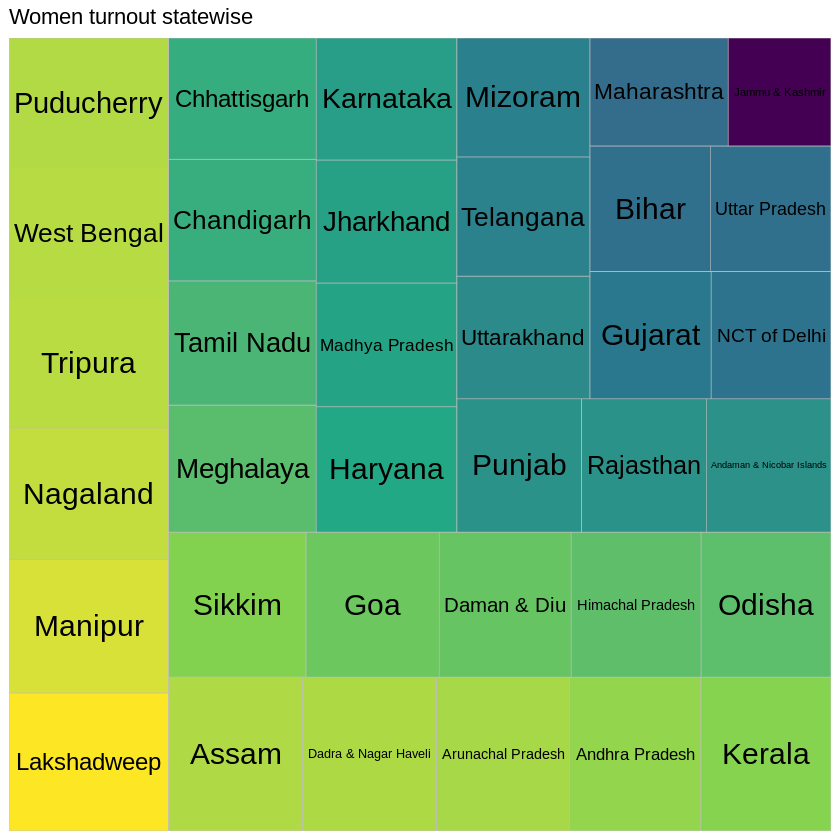

In [ ]:
ggplot(women_participation, aes(area = x_of_women_voters_over_women_electors, label = state, fill = x_of_women_voters_over_women_electors)) +
  geom_treemap()+
  geom_treemap_text(place = "centre") +
labs(title = "Women turnout statewise") + scale_fill_viridis_c() + theme(legend.position = "none")

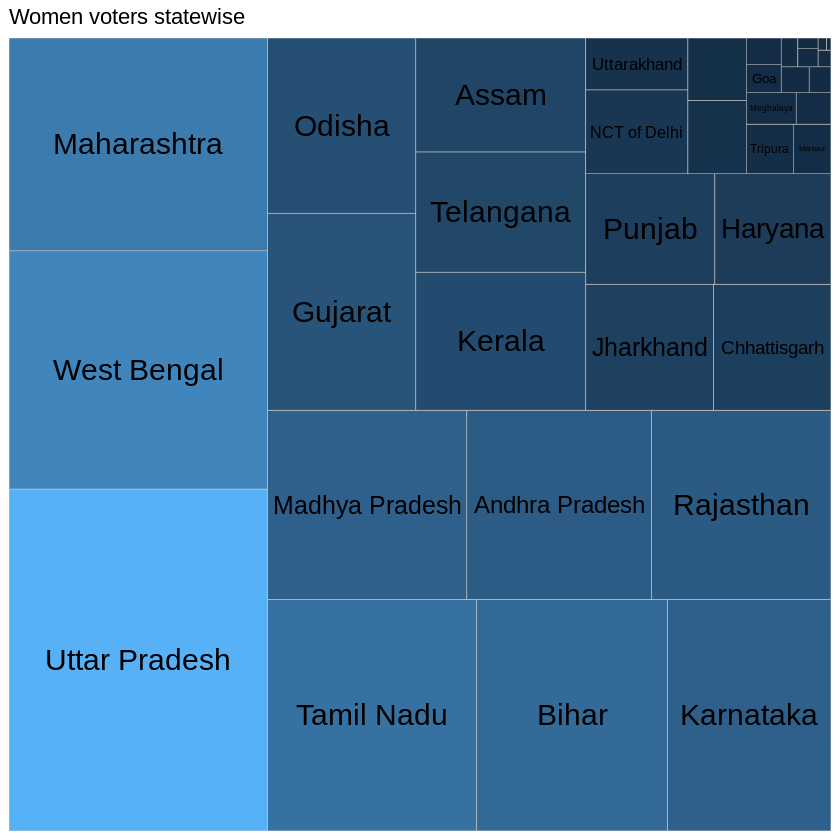

In [ ]:
ggplot(women_participation, aes(area = women_voters, label = state, fill = women_voters)) +
  geom_treemap()+
  geom_treemap_text(place = "centre") +
labs(title = "Women voters statewise")  + theme(legend.position = "none")

In [ ]:
# Finding the total number of seats in India.

total_seats <- sum(women_participation$no_of_seats)
total_seats

[1] 543

Warning message in geom_col(stat = "identity", fill = "darkorange", width = 0.5):
“Ignoring unknown parameters: `stat`”


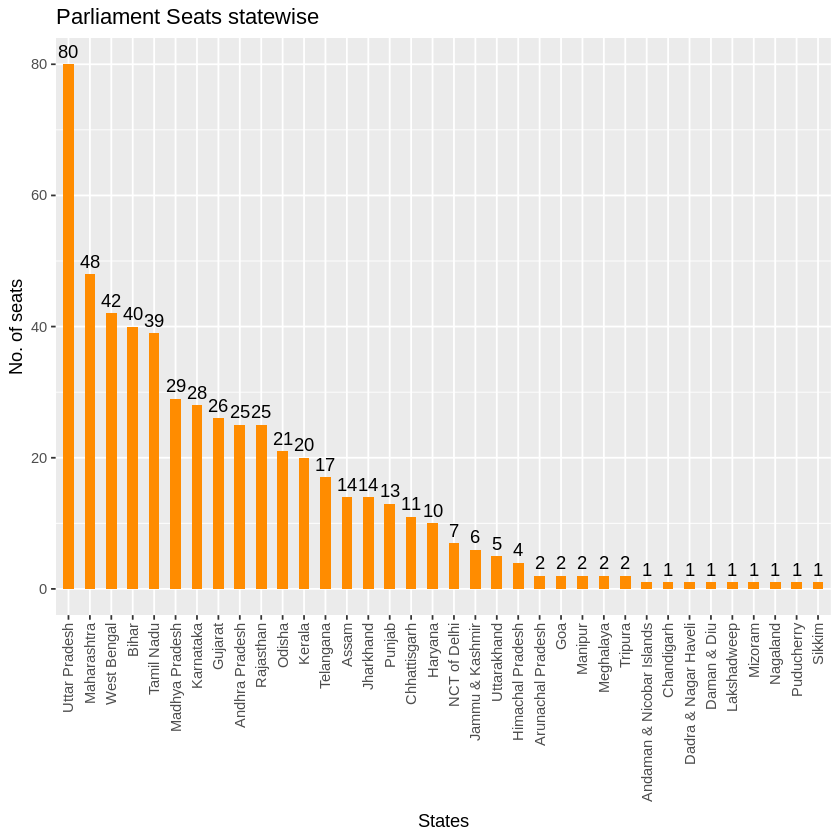

In [ ]:
ggplot(women_participation, aes(x = reorder(state, -no_of_seats), y = no_of_seats)) +
  geom_text(aes(label = no_of_seats), vjust = -0.5) +
  geom_col(stat = "identity", fill = "darkorange", width = 0.5) +
  theme(axis.text.x = element_text(angle=90, vjust=.5, hjust=1)) +
  labs(title = "Parliament Seats statewise", x = "States", y = "No. of seats")

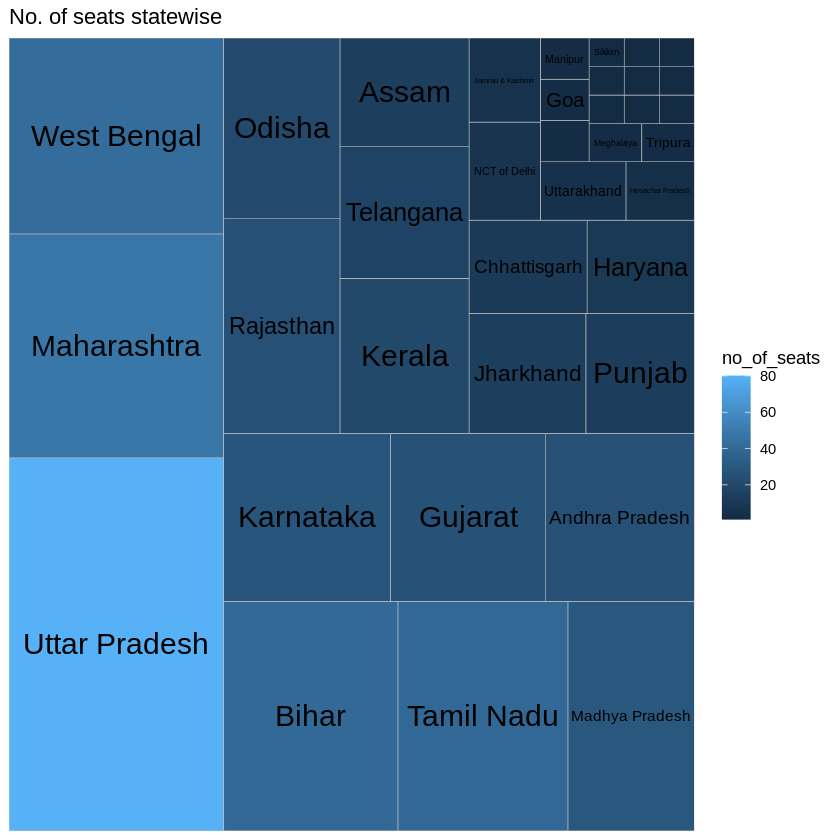

In [ ]:
ggplot(women_participation, aes(area = no_of_seats, label = state, fill = no_of_seats)) +
  geom_treemap()+
  geom_treemap_text(place = "centre") +
labs(title = "No. of seats statewise")

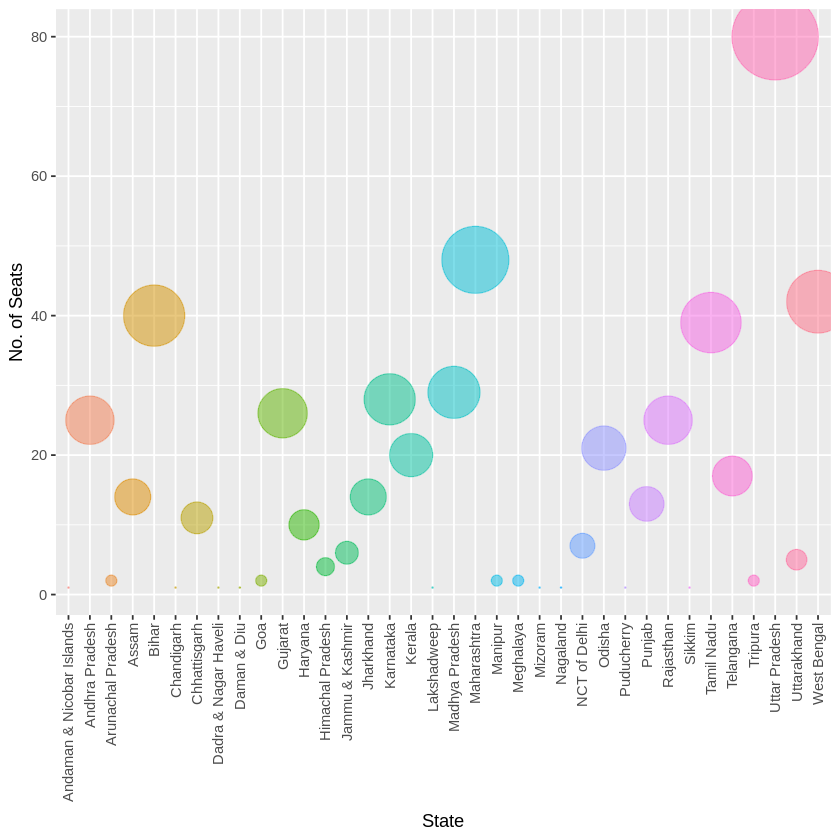

In [ ]:
ggplot(women_participation,
       aes(x = state, y = no_of_seats, size = no_of_seats, color = state)) +
geom_point(alpha = 0.5, show.legend = FALSE ) + scale_size(range = c(.1, 24),
                                                           name="Population (M)") +
theme(axis.text.x = element_text(angle=90, vjust=.5, hjust=1)) + labs(Title = "Seats representation statewise through a bubblechart", x = "State", y = "No. of Seats")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


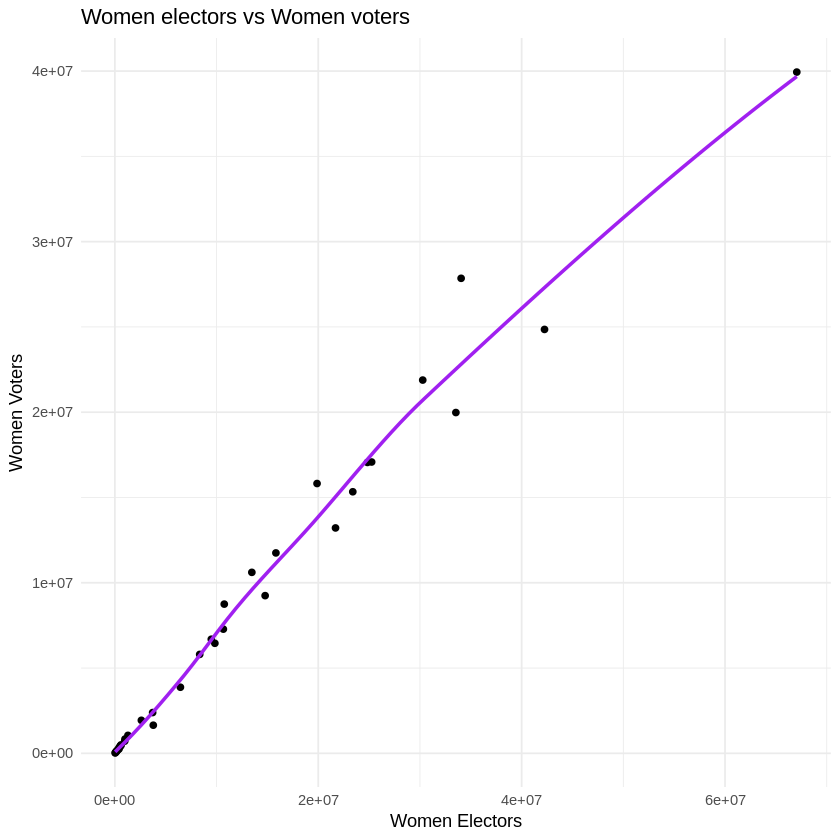

In [ ]:
ggplot(women_participation,aes(x=women_electors, y=women_voters)) +
geom_point() + geom_smooth(se = FALSE, color = "purple") +
labs(title = "Women electors vs Women voters", x = "Women Electors", y = "Women Voters") + theme_minimal()

In [ ]:
women_participation %>%
summarise(cr_womenelectors_womenvoters = cor(women_electors,women_voters))

cr_womenelectors_womenvoters
<dbl>
0.9882616


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


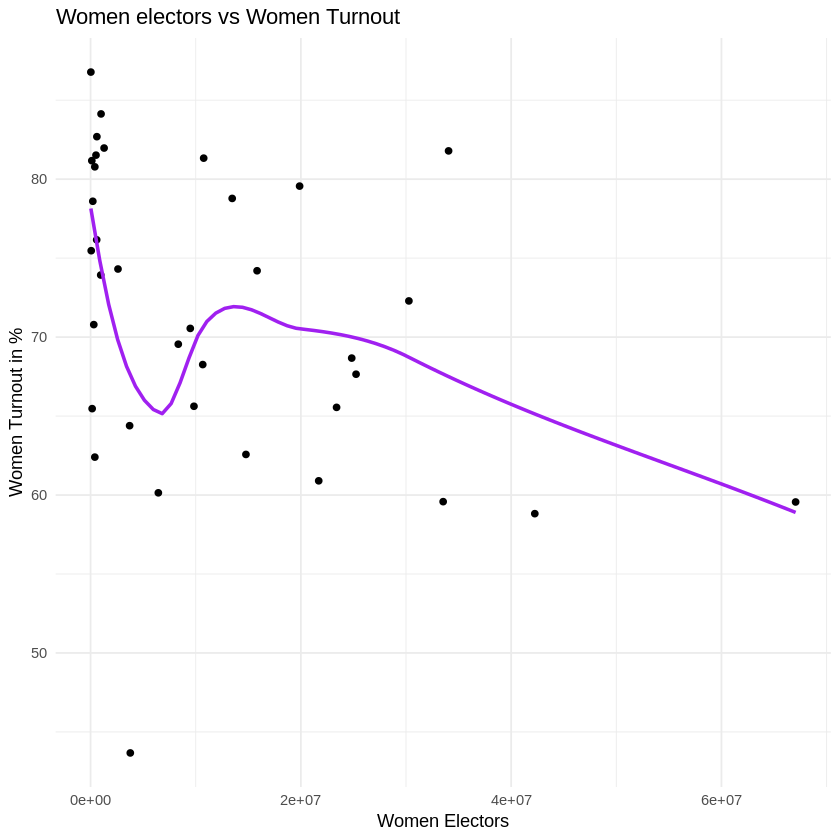

In [ ]:
ggplot(women_participation,aes(x=women_electors,y=x_of_women_voters_over_women_electors)) + geom_point() + geom_smooth(se = FALSE, color = "purple") +
labs(title = "Women electors vs Women Turnout", x = "Women Electors", y = "Women Turnout in %") +
theme_minimal()

In [ ]:
#Comparing Voter Turnout Between Women and Non-Women Electors using t test
t_test_turnout <- t.test(women_participation$women_voters,
                         women_participation$total_voters - women_participation$women_voters,
                         alternative = "two.sided",
                         var.equal = TRUE)

print(t_test_turnout)


	Two Sample t-test

data:  women_participation$women_voters and women_participation$total_voters - women_participation$women_voters
t = -0.29075, df = 70, p-value = 0.7721
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5553236  4140139
sample estimates:
mean of x mean of y 
  8184009   8890558 



In [ ]:
#Split the dataset into two groups:
#States with a high percentage of women electors (≥50%)
#States with a low percentage of women electors (<50%)

# Create a binary group based on women electors' percentage
women_participation$high_women_elector <- ifelse(
  women_participation$x_of_women_electors_over_total_electors >= 50, "High", "Low"
)

# Perform t-test on women voters
t_test_turnout_group <- t.test(women_voters ~ high_women_elector,
                               data = women_participation,
                               var.equal = TRUE)

print(t_test_turnout_group)


	Two Sample t-test

data:  women_voters by high_women_elector
t = -0.8813, df = 34, p-value = 0.3843
alternative hypothesis: true difference in means between group High and group Low is not equal to 0
95 percent confidence interval:
 -10947433   4324605
sample estimates:
mean in group High  mean in group Low 
           5700449            9011862 



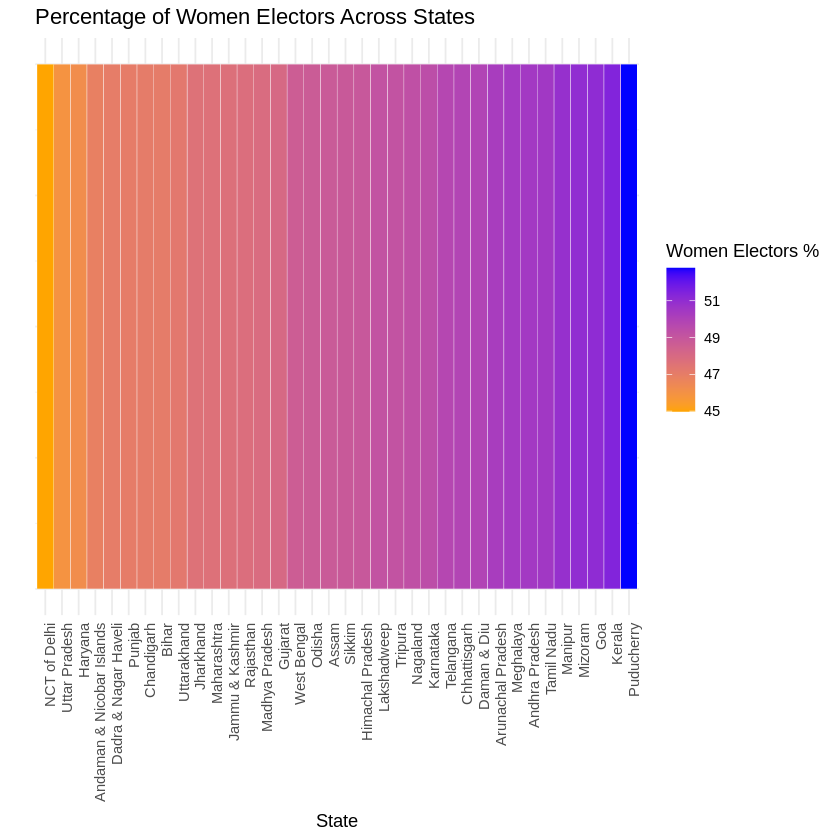

In [ ]:
# Heatmap with gradient colors based on percentage of women electors
ggplot(women_participation, aes(x = reorder(state, x_of_women_electors_over_total_electors),
                                y = 1, fill = x_of_women_electors_over_total_electors)) +
  geom_tile(color = "white") +
  labs(title = "Percentage of Women Electors Across States",
       x = "State",
       y = "",
       fill = "Women Electors %") +
  theme_minimal() +
  theme(axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_fill_gradient(low = "orange", high = "blue")


In [ ]:
# Calculate correlations
#Women Electors vs Women Voters
correlation_women <- cor(women_participation$women_electors,
                         women_participation$women_voters,
                         use = "complete.obs") # Handle missing values

#Women Electors vs Total Electors
correlation_total <- cor(women_participation$women_electors,
                         women_participation$total_electors,
                         use = "complete.obs")

# Print results
print(paste("Correlation between Women Electors and Women Voters:", correlation_women))
print(paste("Correlation between Women Electors and Total Electors:", correlation_total))



[1] "Correlation between Women Electors and Women Voters: 0.988261630736862"
[1] "Correlation between Women Electors and Total Electors: 0.999202324742272"


In [ ]:
# Create a correlation matrix for all numeric variables
correlation_matrix <- women_participation %>%
  select(where(is.numeric)) %>% # Select only numeric columns
  cor(use = "complete.obs")     # Correlation matrix

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

[1] "Correlation Matrix:"
                                        no_of_seats total_electors
no_of_seats                               1.0000000      0.9961165
total_electors                            0.9961165      1.0000000
women_electors                            0.9975231      0.9992023
x_of_women_electors_over_total_electors  -0.2751767     -0.3125369
total_voters                              0.9924521      0.9885292
women_voters                              0.9901933      0.9832042
x_of_women_voters_over_voters            -0.3253774     -0.3621526
x_of_women_voters_over_women_electors    -0.3456088     -0.3736064
total_poll_in_the_state_ut               -0.3191107     -0.3456456
                                        women_electors
no_of_seats                                  0.9975231
total_electors                               0.9992023
women_electors                               1.0000000
x_of_women_electors_over_total_electors     -0.2942683
total_voters                 

In [ ]:
install.packages("sf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’




In [ ]:
library(ggplot2)
library(sf)
library(dplyr)
library(plotly)

# Example data (replace with your actual data)
women_voters <- data.frame(
  State = c("Andhra Pradesh", "Arunachal Pradesh", "Uttar Pradesh", "Maharashtra", "Bihar", "West Bengal", "Tamil Nadu", "Assam", "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jammu and Kashmir", "Karnataka", "Kerala", "Madhya Pradesh", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Orissa", "Punjab", "Rajasthan", "Sikkim", "Tamil Nadu", "Tripura", "Chhattisgarh", "Jharkhand", "Uttaranchal", "Telangana", "Ladakh"),
  Women_Voters = c(15818269, 326188, 39940959, 24852972, 19980370, 27849638, 21883813, 8748413, 441780, 13214160, 5800424, 1936405, 1649547, 17080302, 10611007, 17054749, 838345, 713584, 252218, 494895, 11749761, 6451544, 15335166, 166645, 1053907, 39940959, 6689325, 7281044, 2390956, 9245494, 50000)
)

In [ ]:
india_shapefile <- st_read("in.json") # Replace with actual file path


Reading layer `in' from data source `/content/in.json' using driver `GeoJSON'
Simple feature collection with 36 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 68.18625 ymin: 6.754256 xmax: 97.41163 ymax: 37.07827
Geodetic CRS:  WGS 84


In [ ]:
# Merge the voter data with the shapefile
india_data <- india_shapefile %>%
  left_join(women_voters, by = c("name" = "State")) # Adjust column name

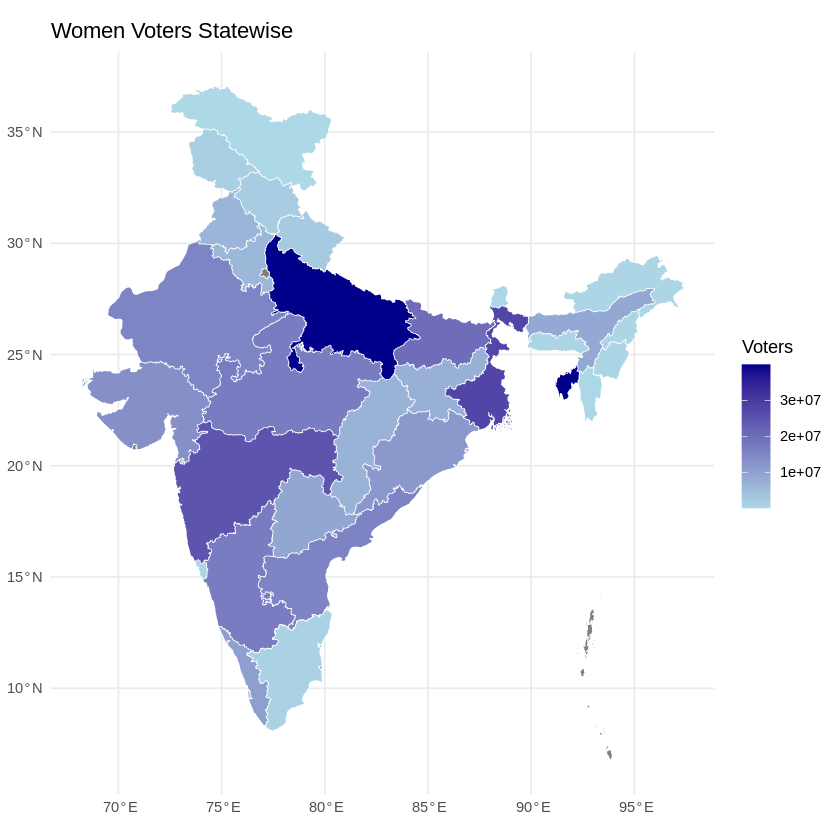

In [ ]:
ggplot(data = india_data) +
  geom_sf(aes(fill = Women_Voters), color = "white") +
  scale_fill_gradient(low = "lightblue", high = "darkblue", na.value = "grey50") +
  labs(title = "Women Voters Statewise",
       fill = "Voters") +
  theme_minimal()
